# Aprendizaje No Supervisado 2020 DiploDatos
    Laura Alonso Alemany, Ana Georgina Flesia y Valeria Rulloni
#  Agrupamiento con el FIFA 2020 dataset
    
Material basado en notas de Ana Georgina Flesia bajo los términos y condiciones de la licencia [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/), a su vez basado de material de [SilveMel](https://www.kaggle.com/karangadiya/fifa19/downloads/data.csv/comments) y otros.

## Adaptación de dataset FIFA 2019 a FIFA 2020
    Grupo 14: Edgardo Garrigo, Iván Gutierrez y Javier Gallo

### Indice de temas
1. [Inicialización del entorno](#1.-Inicialización-del-entorno)
2. [Preparación de los datos](#2.-Preparación-de-los-datos)
3. [Visualizacion con embeddings:tSNE](#3.-Visualizacion-con-embeddings:tSNE)
4. [Componentes Principales](#4.-Componentes-Principales)
5. [Clustering](#5.-Clustering)


## 1.-Inicialización-del-entorno

Empezamos cargando algunas herramientas para cargar los datos y manipularlos.

In [318]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import itertools
import warnings
import io
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.tools as tls  # visualization
import plotly.figure_factory as ff  # visualization
import seaborn as sns
import time


from plotly.offline import init_notebook_mode, plot, iplot
from sklearn import manifold, decomposition, preprocessing, metrics
from sklearn.cluster import KMeans,MeanShift, estimate_bandwidth


init_notebook_mode(connected=True)

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

In [319]:
RandomState = 42

## 2.-Preparación-de-los-datos

Cargamos los datos bajados de la database de [Kaggle](https://www.kaggle.com/karangadiya/fifa19) como 'data.csv'. 

In [320]:
df=pd.read_csv("players_20.csv")
df.describe()


,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,1.698000e+04,18038.000000,18038.000000,1126.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,4.740717e+06,20.103892,2021.114591,12.114565,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,1.103002e+07,16.603639,1.289888,6.735922,11.297656,14.029418,10.407844,10.284950,16.419528,9.760162,7.736278,7.244023,7.510709,8.154062,10.634038,8.447876,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.300000e+04,1.000000,2019.000000,1.000000,24.000000,15.000000,24.000000,23.000000,15.000000,27.000000,44.000000,42.000000,35.000000,45.000000,12.000000,41.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,5.000000,12.000000,11.000000,11.000000,21.000000,12.000000,14.000000,19.000000,12.000000,20.000000,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,5.630000e+05,9.000000,2020.000000,6.000000,61.000000,42.000000,50.000000,57.000000,36.000000,59.000000,60.000000,58.000000,57.000000,60.750000,29.000000,58.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,54.000000,56.000000,57.

In [321]:
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,...,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,...,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,...,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,...,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,...,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish

In [322]:
positions_df = df.player_positions.str.split(',', expand=True)
df = pd.melt(
    df.join(positions_df),
    id_vars=df.columns,
    value_vars=positions_df.columns,
    var_name='position_index',
    value_name='position'
)

df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,...,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,position_index,position
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,...,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2,0,RW
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,...,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,0,ST
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,...,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3,0,LW
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,...,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,GK
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Finesse Shot, Spee..."

Preparamos la base para Clustering:

Retiramos jugadores con bajo Desempeño global ("overall")

y consideramos Variables de desempeño por habilidad (skills_ratings)

In [323]:
n = 10000  # cantidad de jugadores a considerar

df_n = df.loc[:n]  # se reduce la base a los n primeros jugadores

df_over = df_n[(df_n.overall > 70)]

skills_ratings = ['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
                  'passing', 'attacking_short_passing', 'attacking_volleys', 'dribbling',
                  'skill_dribbling', 'skill_curve', 'skill_fk_accuracy',
                  'skill_ball_control', 'movement_acceleration',
                  'movement_sprint_speed', 'movement_agility', 'movement_reactions',
                  'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina',
                  'power_strength', 'power_long_shots', 'mentality_aggression',
                  'mentality_interceptions', 'mentality_positioning', 'mentality_vision',
                  'mentality_penalties',  'mentality_composure', 'defending_marking',
                  'defending_standing_tackle', 'defending_sliding_tackle',
                  'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes',
                  'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
                  'goalkeeping_positioning', 'goalkeeping_reflexes']
print(len(skills_ratings), 'variables numéricas de desempeño según habilidad')

df_skills=df_over[skills_ratings]
df_skills.isna().sum()

40 variables numéricas de desempeño según habilidad


attacking_crossing               0
attacking_finishing              0
attacking_heading_accuracy       0
passing                        440
attacking_short_passing          0
attacking_volleys                0
dribbling                      440
skill_dribbling                  0
skill_curve                      0
skill_fk_accuracy                0
skill_ball_control               0
movement_acceleration            0
movement_sprint_speed            0
movement_agility                 0
movement_reactions               0
movement_balance                 0
power_shot_power                 0
power_jumping                    0
power_stamina                    0
power_strength                   0
power_long_shots                 0
mentality_aggression             0
mentality_interceptions          0
mentality_positioning            0
mentality_vision                 0
mentality_penalties              0
mentality_composure              0
defending_marking                0
defending_standing_t

Se considera que los jugadores que no tienen calificacion en alguna habilidad es porque no la necesitan para su puesto.
Se considera la calificacion como 0

In [324]:
df_skills = df_skills.fillna(0)

In [325]:
df_skills.isna().sum()

attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
passing                       0
attacking_short_passing       0
attacking_volleys             0
dribbling                     0
skill_dribbling               0
skill_curve                   0
skill_fk_accuracy             0
skill_ball_control            0
movement_acceleration         0
movement_sprint_speed         0
movement_agility              0
movement_reactions            0
movement_balance              0
power_shot_power              0
power_jumping                 0
power_stamina                 0
power_strength                0
power_long_shots              0
mentality_aggression          0
mentality_interceptions       0
mentality_positioning         0
mentality_vision              0
mentality_penalties           0
mentality_composure           0
defending_marking             0
defending_standing_tackle     0
defending_sliding_tackle      0
gk_diving                     0
gk_handl

## 3.-Visualizacion-con-embeddings:tSNE

Trasnformamos el espacio de dim 40 en un espacio de dimensión 2 (n_components=2)

In [326]:

time_start = time.time()

tsne = manifold.TSNE(n_components=2, verbose=1,perplexity=30, n_iter=1000, random_state = RandomState)
X_tsne = tsne.fit_transform(df_skills)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4756 samples in 0.036s...
[t-SNE] Computed neighbors for 4756 samples in 1.006s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4756
[t-SNE] Computed conditional probabilities for sample 2000 / 4756
[t-SNE] Computed conditional probabilities for sample 3000 / 4756
[t-SNE] Computed conditional probabilities for sample 4000 / 4756
[t-SNE] Computed conditional probabilities for sample 4756 / 4756
[t-SNE] Mean sigma: 12.935012
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.693634
[t-SNE] KL divergence after 1000 iterations: 1.845202
t-SNE done! Time elapsed: 25.069730281829834 seconds


In [327]:
X_tsne[1990:2000] #diez jugadores

array([[ 26.14039  , -18.293892 ],
       [-16.976593 ,  11.319233 ],
       [ 70.78054  , -21.166739 ],
       [ 62.975273 , -15.552057 ],
       [ 46.309326 , -14.82477  ],
       [ 72.68871  , -11.718402 ],
       [ 38.178345 , -16.099808 ],
       [-13.830445 ,  21.373396 ],
       [-38.625244 ,  43.16067  ],
       [ -4.39733  ,  -4.8979487]], dtype=float32)

**GRAFICAMOS: Scatter plot** 

Las variables que usamos para el scatterplot son las 2 componentes dadas por tSNE

agregamos los nombres de los "cracks" ("overall" más de 85) y vemos una tercera variable recorriendo los puntos sobre el gráfico

In [328]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
data = []
bool_crack = df_over['overall'] > 85  # diferenciamos a los mejores jugadores

# graficamos los datos en el espacio transformado: las dos componentes tsne

graf1 = go.Scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], mode='markers',
                   text=df_n.loc[:, 'short_name'], marker=dict(size=5))  #, 'Height', 'Weight', 'Club', 'Age', 'Name','Position'

crack = go.Scatter(
    x=X_tsne[bool_crack, 0],
    y=X_tsne[bool_crack, 1],
    name='Los mas mejores',
    text=df_over.loc[bool_crack, 'short_name'],
    textfont=dict(family='sans serif', size=10, color='black'),
    opacity=0.9,
    mode='text',
    )

data = [graf1, crack]

layout = go.Layout(
    title='Visualizacion de la base en el espacio tsne',
    titlefont=dict(size=20),
    xaxis=dict(title='componente 1'),
    yaxis=dict(title='componente 2'),
    autosize=False,
    width=1000,
    height=1000,
    )

fig = go.Figure(data=data, layout=layout)

# iplot(fig)

plot(fig)


'temp-plot.html'

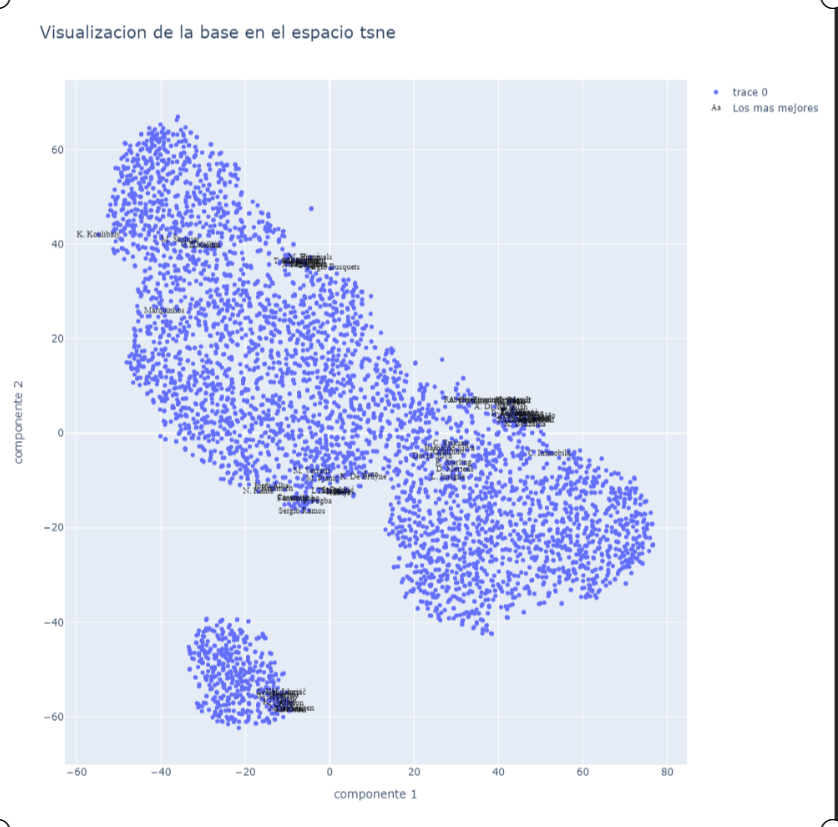

**INTERPRETACIÓN**

Un poco de análisis visual supervisado usando tsne

Ponemos a prueba la intuición o preconcepto de que los jugadores se agrupan en el espacio de las habilidades (transformado/reducido por tsne) según la posición... 

Creamos una nueva columna con 4 categorias de posiciones:

In [329]:
forwards=['RF','LF', 'RW','LW', 'RS','ST', 'LS', 'CF']
midfielders=['RCM','LCM','RDM','LDM','CDM','RAM','CAM','LAM','CM', 'LM', 'RM']
defenders=['RCB','LCB','RB','CB','LB','RWB','LWB']
goalkeepers=['GK']

def pos2(position):
    if position in forwards:
        return 'Forward'
    
    elif position in midfielders:
        return 'Midfielder'
    
    elif position in defenders:
        return 'Defender'
    
    elif position in goalkeepers:
        return 'GK'
    
    else:
        return 'nan'
    

In [330]:
df_over["Position_field"]=df_over["position"].apply(lambda x: pos2(x))

df_over["Position_field"].value_counts()

Midfielder    1859
Defender      1471
Forward        986
GK             440
Name: Position_field, dtype: int64

**GRAFICAMOS** 

Las variables que usamos para el scatterplot son las 2 componentes dadas por tSNE

diferenciamos usando vectores booleanos: para cada posición y si es un ckack 

In [331]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
bool_striker = df_over['Position_field'] == 'Forward'
bool_midfielder = df_over['Position_field'] == 'Midfielder'
bool_defender = df_over['Position_field'] == 'Defender'
bool_gk = df_over['Position_field'] == 'GK'
bool_nan = df_over['Position_field'] == 'nan'

bool_crack = df_over['overall'] > 85

palette = [
    'navy',
    'red',
    '#A2D5F2',
    'orange',
    'green',
    'pink',
    ]
data = []

striker = go.Scatter(
    x=X_tsne[bool_striker, 0],
    y=X_tsne[bool_striker, 1],
    name='Striker',
    text=df_over.loc[bool_striker, 'short_name'],
    opacity=0.9,
    marker=dict(color=palette[2], size=5),
    mode='markers',
    )

midfielder = go.Scatter(
    x=X_tsne[bool_midfielder, 0],
    y=X_tsne[bool_midfielder, 1],
    name='Midfielder',
    text=df_over.loc[bool_midfielder, 'short_name'],
    opacity=0.6,
    marker=dict(color=palette[1], size=5),
    mode='markers',
    )

defender = go.Scatter(
    x=X_tsne[bool_defender, 0],
    y=X_tsne[bool_defender, 1],
    name='Defender',
    text=df_over.loc[bool_defender, 'short_name'],
    opacity=0.7,
    marker=dict(color=palette[3], size=5),
    mode='markers',
    )

gk = go.Scatter(
    x=X_tsne[bool_gk, 0],
    y=X_tsne[bool_gk, 1],
    name='GK',
    text=df_over.loc[bool_gk, 'short_name'],
    opacity=0.4,
    marker=dict(color=palette[4], size=5),
    mode='markers',
    )

nan = go.Scatter(
    x=X_tsne[bool_nan, 0],
    y=X_tsne[bool_nan, 1],
    name='NAN',
    text=df_over.loc[bool_nan, 'short_name'],
    opacity=0.4,
    marker=dict(color=palette[5], size=5),
    mode='markers',
    )

crack = go.Scatter(
    x=X_tsne[bool_crack, 0],
    y=X_tsne[bool_crack, 1],
    name='Top player',
    text=df_over.loc[bool_crack, 'short_name'],
    textfont=dict(family='sans serif', color='black', size=16),
    opacity=0.9,
    mode='text',
    )

data = [striker, midfielder, defender, gk, crack]

layout = go.Layout(title='t-SNE - Fifa Players',
                   titlefont=dict(size=20), autosize=False, width=1150,
                   height=1150)

fig = go.Figure(data=data, layout=layout)

# iplot(fig)

plot(fig)


'temp-plot.html'

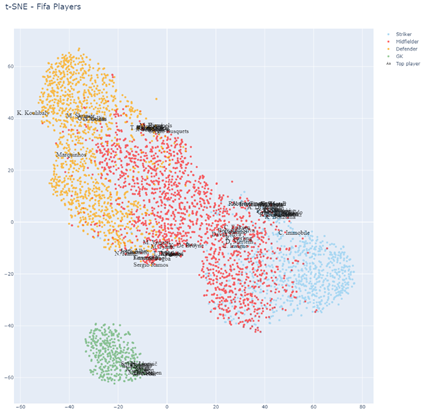

Como conclusión, 
El resultado encontrado es similar al del FIFA 2019 que vimos en clase.

Podemos ver la clara separacion de los arqueros del grupo de jugadores de campo.
Se observa el grafico zonificado para cada una de las tres grandes posiciones dentro del campo (Defensa, Central, Delantero), aunque no tienen una delimitacion o separacion clara debido a que muchos jugadores pueden hacerlo en mas de una posicion, hoy en dia las posiciones son dinamicas (un jugador puede rotar dentro de la cancha en un partido y pararse en otra posicion en un mismo partido)

Lo que si se puede observar separadamente son los grupos de los mejores en cada posicion. Se encuentran bien definidos como subgrupo dentro de cada separacion los arqueros y los delanteros y en menor medida los defensores, y dentro de los mediocampistas se pueden observar tres subgrupos uno que representaria la union de los mejores jugadores que se pueden desempañar en posiciones de defensa y mediocampo, otro en posiciones de mediocampo y delantero, y un tercer subgrupo con habilidades de defensa, medicampo y delantero.



## 4.-Componentes-Principales 

**Variables de desempeño (skills_ratings)**

**Retiramos arqueros y jugadores con bajo ranking**


In [332]:
n_acp=18000

df_acp=df.loc[:n_acp]
df_acp=df_acp[(df_acp["position"]!='GK')&(df['overall']>70)]

skills_ratings = ['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
                  'passing', 'attacking_short_passing', 'attacking_volleys', 'dribbling',
                  'skill_dribbling', 'skill_curve', 'skill_fk_accuracy',
                  'skill_ball_control', 'movement_acceleration',
                  'movement_sprint_speed', 'movement_agility', 'movement_reactions',
                  'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina',
                  'power_strength', 'power_long_shots', 'mentality_aggression',
                  'mentality_interceptions', 'mentality_positioning', 'mentality_vision',
                  'mentality_penalties',  'mentality_composure', 'defending_marking',
                  'defending_standing_tackle', 'defending_sliding_tackle'] 


#otros skills_ratings ! sacamos las habilidades de los arqueros

Restringimos los datos a las variables numéricas que consideramos

In [333]:
X=df_acp[skills_ratings] # Datos para proyectar
print('los datos tienen dimesión n= ',len(skills_ratings))

los datos tienen dimesión n=  30


**Se computan las componentes principales**

-cuando se usa *decomposition.PCA* : 

La descomposición PCA del sklearn centra los datos pero no los normaliza (input data is centered but not scaled for each feature before applying the SVD)

por eso **estandarizamos primero**

In [334]:
std_scale=preprocessing.StandardScaler().fit(X)
X_scaled=std_scale.transform(X) # numpyarray normalizado por columna

In [335]:
print(X_scaled[0:2])
X.head(2)

[[ 1.85191727  2.22591719  0.50579762  2.96886868  3.10516247  2.04822158
   2.84551206  2.51241012  2.10810769  2.43109902  3.18353021  1.64821701
   1.12843689  1.84130682  4.14284295  2.07189558  1.52906387 -0.08406758
   0.22655488 -0.19387423  2.1898988  -1.4663244  -0.88327707  2.03265645
   2.40441334  1.23931568  3.66320434 -1.29845475 -1.00858184 -1.34122585]
 [ 1.55947807  2.16540639  2.10231142  1.8233006   1.74199744  1.98481151
   2.06984609  1.7868031   1.30894567  1.31434768  2.6471945   1.4928247
   1.69221681  1.36330133  4.32209798  0.25161067  2.3556585   2.17528741
   1.22615709  0.66487084  2.12277809 -0.34105661 -1.43450959  2.09945366
   1.42414494  2.0028642   3.51747437 -1.56314263 -1.24990788 -1.43455936]]


,attacking_crossing,attacking_finishing,attacking_heading_accuracy,passing,attacking_short_passing,attacking_volleys,dribbling,skill_dribbling,skill_curve,skill_fk_accuracy,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
0,88,95,70,92.0,92,88,96.0,97,93,94,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26
1,84,94,89,82.0,83,87,89.0,89,81,76,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24


**DESCOMPOSICIÓN PCA**

En la descomposición podemos elegir n_components para quedarnos con una cantidad chica de componentes 

La idea es que sean "bastante" menos que la dimensión de lo datos pero que describan un buen porcentaje de la dispersión de los datos

In [336]:
pca=decomposition.PCA(n_components=6, random_state = RandomState) #elegimos 2, 3 o 4 pero pueden ser más, 

pca.fit(X_scaled) #input data is centered but not scaled for each feature before applying the SVD

# proporción de varianza
print('proporción de varianza por componente: ', pca.explained_variance_ratio_)

# proporción de varianza acumulada
print ('proporción de varianza por componente acumulada: ', pca.explained_variance_ratio_.cumsum())

X_projected=pca.transform(X_scaled) #numpy array
print ('tamaño de los datos: ', X_projected.shape)


proporción de varianza por componente:  [0.44796144 0.14976136 0.10194941 0.06073468 0.03419596 0.02666793]
proporción de varianza por componente acumulada:  [0.44796144 0.5977228  0.69967221 0.76040689 0.79460285 0.82127078]
tamaño de los datos:  (4316, 6)


In [337]:
print (X_projected[0:5])#5 primeros jugadores, n_components

[[-10.31294401  -2.71625806   2.00614303  -1.36475111   3.08584019
   -0.18737695]
 [ -8.15572034  -1.53609801   3.76071094  -4.56851001   2.03832359
   -0.42463186]
 [ -9.89937919  -1.65871862   0.88019648  -1.008715     3.04693584
    0.11578822]
 [ -9.2354195   -1.69681127   0.75350522  -1.22193397   2.75146071
    0.80629611]
 [ -7.39845892  -4.9414164    2.31107386  -0.69018223   0.88692697
    0.96663336]]


In [338]:
pcs=pca.components_  #"composición" de las primeras componentes, 
print(pcs)  # el aporte/pesos de las variables: skills_ratings

[[-0.19618149 -0.22708941  0.13234977 -0.21523169 -0.1535073  -0.21842157
  -0.25445245 -0.24770595 -0.22534261 -0.19430512 -0.23373382 -0.16926389
  -0.13948042 -0.20808076 -0.09132363 -0.18267596 -0.18001096  0.06568726
  -0.05379598  0.15293036 -0.22517916  0.12603744  0.14463036 -0.23691547
  -0.22401395 -0.18465833 -0.10941535  0.1497894   0.151927    0.15503904]
 [-0.1699148   0.11754081 -0.01441735 -0.25042844 -0.30701789  0.05714304
  -0.07108163 -0.05089729 -0.09530785 -0.09065852 -0.13109581  0.06779856
   0.08320834  0.01728214 -0.22705705 -0.0400734  -0.02494468 -0.02632677
  -0.19342732 -0.02756962 -0.03014949 -0.25209499 -0.36984173  0.03285291
  -0.14647382  0.05788267 -0.20725179 -0.34876069 -0.36480354 -0.35421385]
 [-0.12631629  0.18031848  0.32680181 -0.00156821  0.04639777  0.21207008
  -0.07678937 -0.05187606  0.02801703  0.09665375  0.04020315 -0.32716717
  -0.29716116 -0.27799378  0.17439513 -0.2951195   0.25365973  0.03509077
  -0.14495242  0.31843039  0.1632505

El siguiente gráfico muestra la composición de los pesos de las dos primeras componentes principales. 

In [339]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
# Graph 1

data = []

for (i, (x, y)) in enumerate(zip(pcs[0, :], pcs[1, :])):
    graph = go.Scatter(
        x=[0, x],
        y=[0, y],
        text=X.columns[i],
        mode='lines+markers+text',
        textposition='top left',
        textfont=dict(family='sans serif', size=15),
        )
    data.append(graph)

layout = go.Layout(
    title='ACP - Fifa Skills',
    titlefont=dict(size=20),
    xaxis=dict(title='Componente 1'),
    yaxis=dict(title='Componente 2'),
    autosize=False,
    width=1050,
    height=750,
    showlegend=False,
    )

fig = go.Figure(data=data, layout=layout)

plot(fig)


'temp-plot.html'

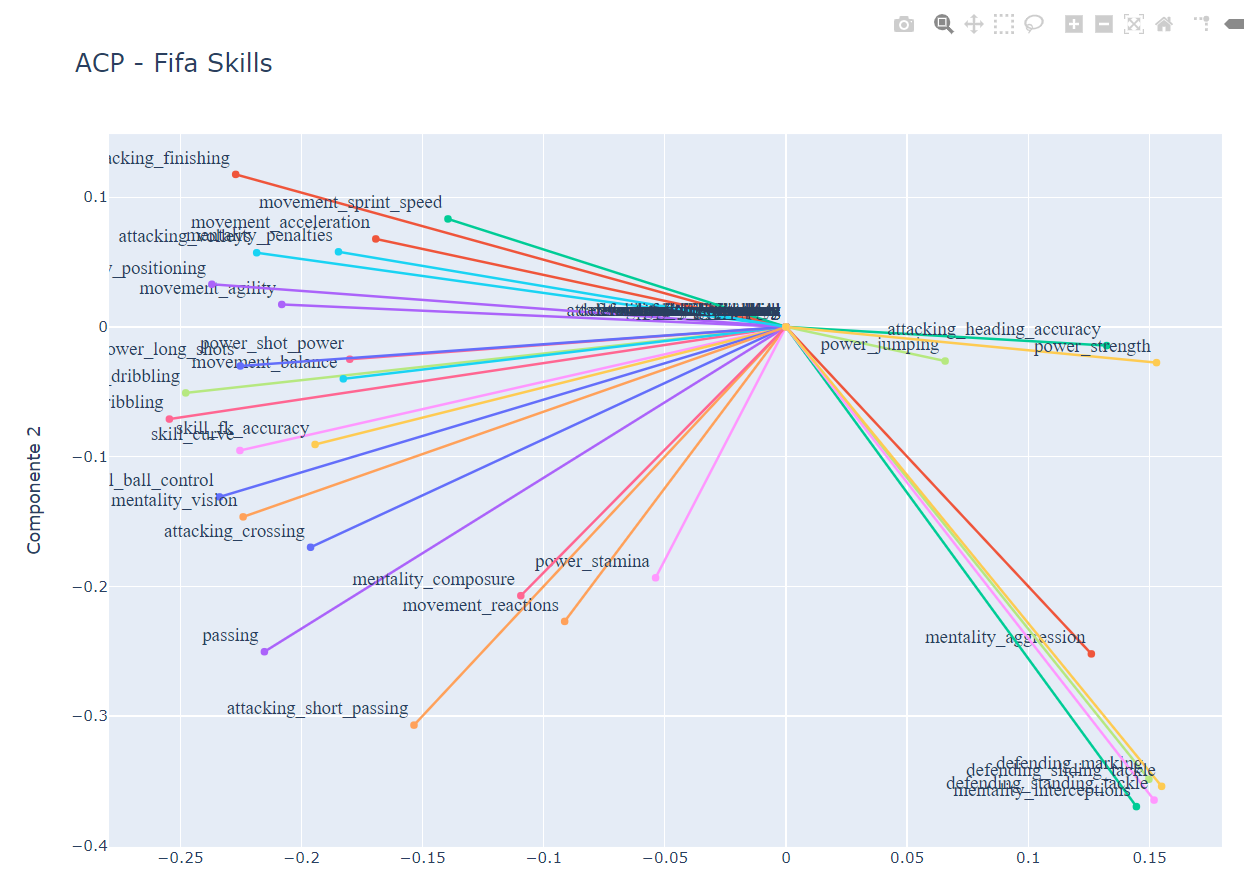

Se crea el jugador perfecto para ver a donde se ubica en nuestra visualización, se lo agrega a los datos normalizados y a las componentes ya calculadas (sin usarlo).

In [394]:
MachineGunDict={'Name':'MachineGun','overall':99}

for skills in skills_ratings:
    MachineGunDict[skills]=99
    
#Lo agregamos a la base:
df_acp=df_acp.append(MachineGunDict,ignore_index=True)
X=df_acp[skills_ratings] # Datos sin estandarizar

X_scaled=std_scale.transform(X) # volvemos a normalizar con el dato agregado 

#pero con la normalización de la base sin el dato nuevo
X_projected=pca.transform(X_scaled) # volvemos a proyectar pero con el dato nuevo

**Graficamos a los jugadores usando las dos primeras componentes de PCA, proyectamos los datos (de dim 30) en ese espacio de dimensión 2**

Identificamos a MachineGun y a un jugador en particular, por ejemplo, Lio Messi: 

In [397]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
# Graph 2
# Choose your player

recherche_joueur = df_acp['Name'] == 'L. Messi'

bool_crack = df_acp['overall'] > 85
bool_no_crack = df_acp['overall'] < 86
bool_machinegun = df_acp['Name'] == 'MachineGun'

palette = [
    'navy',
    'red',
    '#A2D5F2',
    'orange',
    'green',
    'pink',
    ]
data = []

acp_crack = go.Scatter(
    x=X_projected[bool_crack, 0],
    y=X_projected[bool_crack, 1],
    name='Crack',
    text=df_acp.loc[bool_crack, 'Name'],
    textfont=dict(family='sans serif', size=15, color='black'),
    opacity=0.9,
    marker=dict(color=palette[2], size=7),
    mode='markers+text',
    )

acp_no_crack = go.Scatter(
    x=X_projected[bool_no_crack, 0],
    y=X_projected[bool_no_crack, 1],
    name='Average player',
    text=df_acp.loc[bool_no_crack, 'Name'],
    opacity=0.6,
    marker=dict(color=palette[1], size=3),
    mode='markers',
    )

acp_machinegun = go.Scatter(
    x=X_projected[bool_machinegun, 0],
    y=X_projected[bool_machinegun, 1],
    name='Perfect player',
    textfont=dict(family='sans serif', size=20, color='black'),
    opacity=0.6,
    marker=dict(color=palette[3], size=30),
    mode='markers+text',
    )

joueur_recherche = go.Scatter(
    x=X_projected[recherche_joueur, 0],
    y=X_projected[recherche_joueur, 1],
    name='Searched player',
    text=df_acp.loc[recherche_joueur, 'Name'],
    textfont=dict(family='sans serif', size=20, color='black'),
    opacity=1,
    marker=dict(color=palette[4], size=40),
    mode='markers+text',
    )

data = [acp_no_crack, acp_crack, acp_machinegun, joueur_recherche]

layout = go.Layout(
    title='ACP - Fifa Players',
    titlefont=dict(size=20),
    xaxis=dict(title='Componente 1'),
    yaxis=dict(title='componente 2'),
    autosize=False,
    width=1000,
    height=1000,
    )

fig = go.Figure(data=data, layout=layout)

plot(fig)

'temp-plot.html'

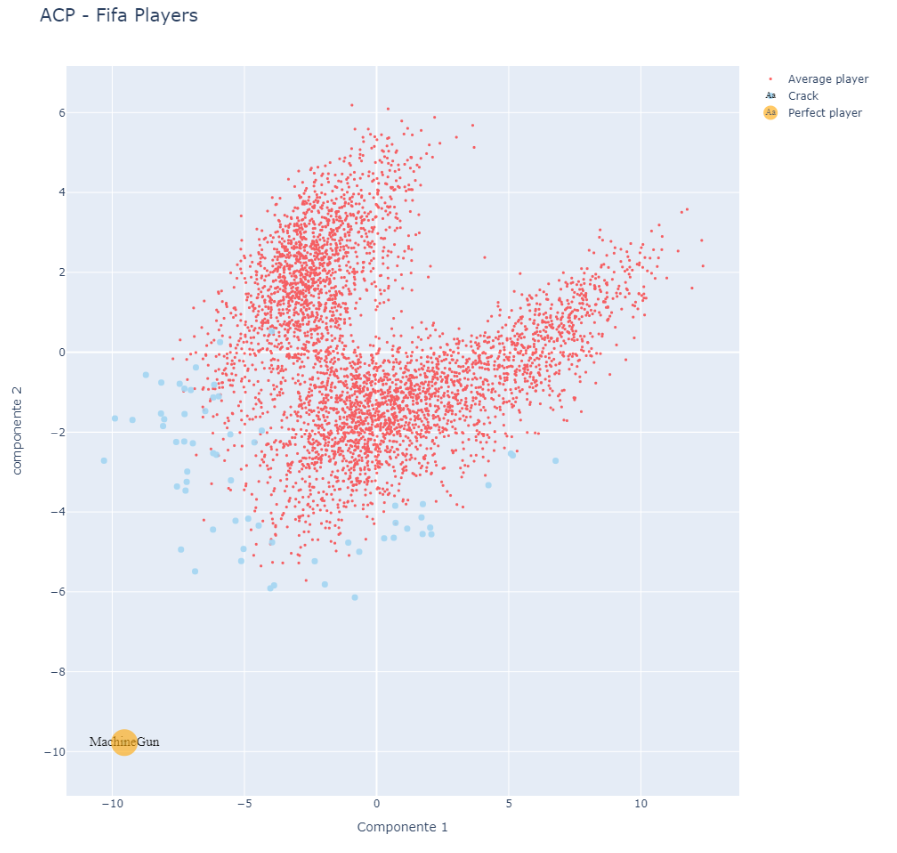

### Comentarios
Mediante PCA, reducimos la cantidad de dimensiones de las características y podemos hacer una grafica en dos dimensiones. En este caso podemos observar como los mejores jugadores se ubican en el tercer y cuarto cuadrante cuando la componente 2 es negativa, con mayor preponderancia al tercer cuadrante. Se observa que el jugador ideal “MachineGun”, esta ubicado en cercano a (-10,-10)

Se puede comparar dos equipos y ver los perfiles de los jugadores en las dos primeras componentes.

In [342]:
df_acp[['club']]

,club
0,FC Barcelona
1,Juventus
2,Paris Saint-Germain
3,Real Madrid
4,Manchester City
...,...
4312,CSA - AL
4313,Columbus Crew SC
4314,Viktoria Plzeň
4315,FCSB (Steaua)


In [353]:
df_acp.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,...,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,position_index,position
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,...,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2,0,RW
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,...,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,0,ST
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,...,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3,0,LW
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,...,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3,0,LW
5,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,28,1991-06-28,181,70,Belgium,Manchester City,91,91,90000000,370000,"CAM, CM",Right,4,5,4,High/High,Normal,Yes,166500000.0,"#Dribbler, #Playmaker , #Engine, #Distance Sh...",RCM,17.0,NaN,2015-08-30,2023.0,RCM,7.

In [343]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
teamA = 'FC Barcelona'
teamB = 'FCSB (Steaua)'

bool_teamA = df_acp['club'] == teamA
bool_teamB = df_acp['club'] == teamB

palette = [
    'navy',
    'red',
    '#A2D5F2',
    'orange',
    'green',
    'pink',
    'grey',
    ]
data = []

acp_teamA = go.Scatter(
    x=X_projected[bool_teamA, 0],
    y=X_projected[bool_teamA, 1],
    name=teamA,
    text=df_acp.loc[bool_teamA, 'Name'],
    textfont=dict(family='sans serif', size=20, color='black'),
    opacity=0.7,
    marker=dict(color=palette[1], size=10),
    mode='markers+text',
    )

acp_teamB = go.Scatter(
    x=X_projected[bool_teamB, 0],
    y=X_projected[bool_teamB, 1],
    name=teamB,
    text=df_acp.loc[bool_teamB, 'Name'],
    textfont=dict(family='sans serif', size=20, color='black'),
    opacity=0.7,
    marker=dict(color=palette[4], size=10),
    mode='markers+text',
    )

acp_all = go.Scatter(
    x=X_projected[:, 0],
    y=X_projected[:, 1],
    name='All',
    text=df_acp.loc[:, 'Name'],
    opacity=0.3,
    marker=dict(color=palette[6], size=3),
    mode='markers',
    )

data = [acp_teamA, acp_teamB, acp_all]

layout = go.Layout(
    title='ACP - {} vs {}'.format(teamA, teamB),
    titlefont=dict(size=20),
    xaxis=dict(title='F1'),
    yaxis=dict(title='F2'),
    autosize=False,
    width=1000,
    height=1000,
    )

fig = go.Figure(data=data, layout=layout)

plot(fig)

'temp-plot.html'

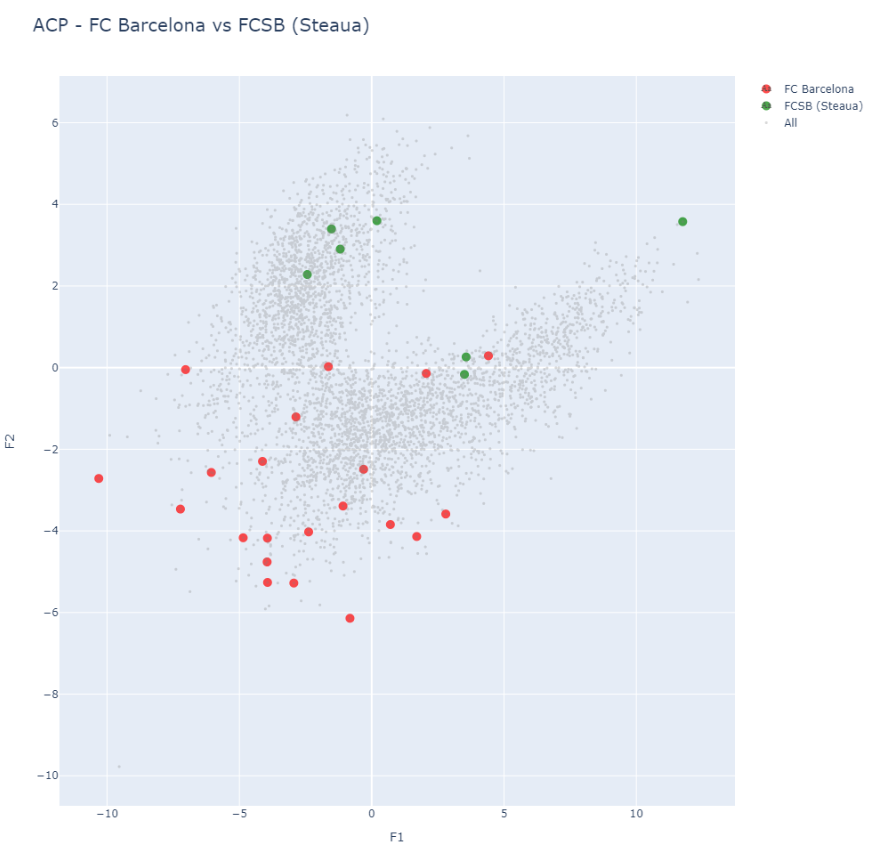

### Comentarios
Al comparar dos equipos uno bueno (Barcelona) y otro no tanto (FCSB Steaua), podemos ver como los jugadores tienen una distribución hacia el tercer cuadrante para el mejor equipo y hacia el primer y segundo cuadrante para los jugadores del equipo no tan bueno

In [361]:
forwards=['RF','LF', 'RW','LW', 'RS','ST', 'LS', 'CF']
midfielders=['RCM','LCM','RDM','LDM','CDM','RAM','CAM','LAM','CM', 'LM', 'RM']
defenders=['RCB','LCB','RB','CB','LB','RWB','LWB']
goalkeepers=['GK']

def pos2(position):
    if position in forwards:
        return 'Forward'
    
    elif position in midfielders:
        return 'Midfielder'
    
    elif position in defenders:
        return 'Defender'
    
    elif position in goalkeepers:
        return 'GK'
    
    else:
        return 'nan'
    

In [362]:
df_acp["Position_field"]=df_acp["position"].apply(lambda x: pos2(x))

df_acp["Position_field"].value_counts()

Midfielder    1859
Defender      1471
Forward        986
Name: Position_field, dtype: int64

In [365]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
bool_striker = df_acp['Position_field'] == 'Forward'
bool_midfielder = df_acp['Position_field'] == 'Midfielder'
bool_defender = df_acp['Position_field'] == 'Defender'
bool_gk = df_acp['Position_field'] == 'GK'
bool_nan = df_acp['Position_field'] == 'nan'

bool_crack = df_acp['overall'] > 85


palette = [
    'navy',
    'red',
    '#A2D5F2',
    'orange',
    'green',
    'pink',
    'grey',
    ]
data = []

striker = go.Scatter(
    x=X_projected[bool_striker, 0],
    y=X_projected[bool_striker, 1],
    name='Striker',
    text=df_acp.loc[bool_striker, 'short_name'],
    opacity=0.9,
    marker=dict(color=palette[2], size=5),
    mode='markers',
    )


midfielder = go.Scatter(
    x=X_projected[bool_midfielder, 0],
    y=X_projected[bool_midfielder, 1],
    name='Midfielder',
    text=df_acp.loc[bool_midfielder, 'short_name'],
    opacity=0.6,
    marker=dict(color=palette[1], size=5),
    mode='markers',
    )

defender = go.Scatter(
    x=X_projected[bool_defender, 0],
    y=X_projected[bool_defender, 1],
    name='Defender',
    text=df_acp.loc[bool_defender, 'short_name'],
    opacity=0.7,
    marker=dict(color=palette[3], size=5),
    mode='markers',
    )

gk = go.Scatter(
    x=X_projected[bool_gk, 0],
    y=X_projected[bool_gk, 1],
    name='GK',
    text=df_acp.loc[bool_gk, 'short_name'],
    opacity=0.4,
    marker=dict(color=palette[4], size=5),
    mode='markers',
    )

nan = go.Scatter(
    x=X_projected[bool_nan, 0],
    y=X_projected[bool_nan, 1],
    name='NAN',
    text=df_acp.loc[bool_nan, 'short_name'],
    opacity=0.4,
    marker=dict(color=palette[5], size=5),
    mode='markers',
    )

crack = go.Scatter(
    x=X_projected[bool_crack, 0],
    y=X_projected[bool_crack, 1],
    name='Top player',
    text=df_acp.loc[bool_crack, 'short_name'],
    textfont=dict(family='sans serif', color='black', size=16),
    opacity=0.9,
    mode='text',
    )

data = [striker, midfielder, defender, gk, crack]

layout = go.Layout(title='ACP - Fifa Players - Position',
                   titlefont=dict(size=20), autosize=False, width=1150,
                   height=1150)

fig = go.Figure(data=data, layout=layout)

# iplot(fig)

plot(fig)


'temp-plot.html'

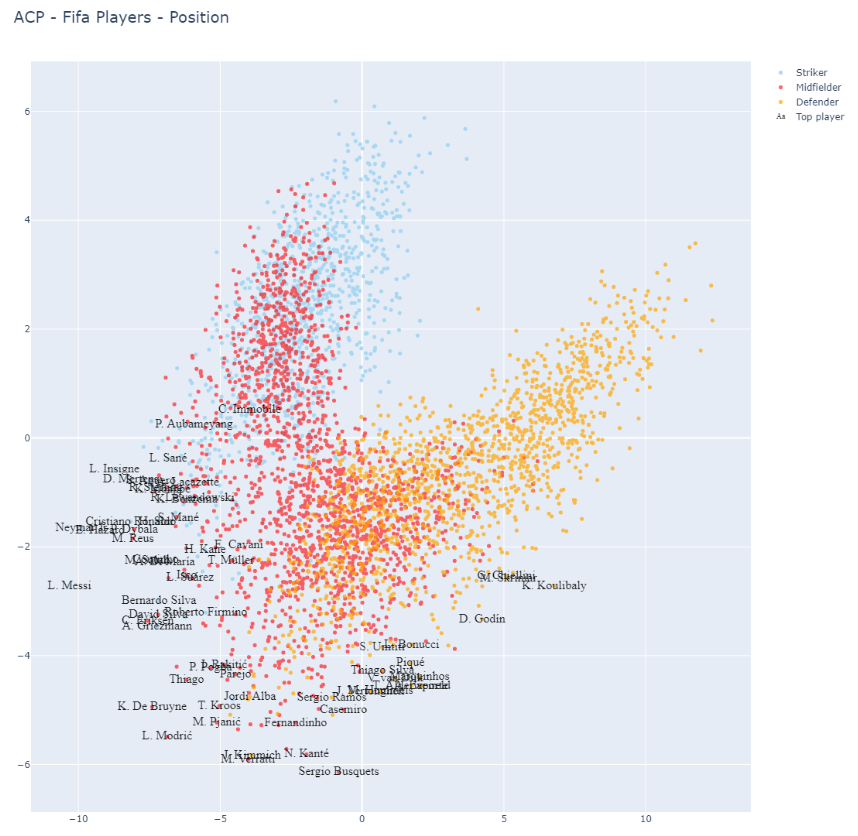

### Comentarios
Al Analizar PCA con las posiciones de los jugadores, se observa como separa muy bien a los defensores y a los delanteros, y los mediocampistas que tienen por lo general habilidades compartidas con los anteriores se encuentra distribuidos entre ambos grupos. Tambien se observa que los mediocampistas en general tienen un mejor “overall” que los delanteros puros, y se nota aún más esa diferencia,cuando tienen habilidades compartidas con los defensores
Probablemente si podríamos hacer una nueva rotación, los mediocampistas se separen de los delanteros y defensores y de esa forma encontrar el hiperplano ideal que segmente correctamente los tres grupos


## 5 .-Clustering

**Trabajo en grupo**: Veamos ahora que agrupamientos podemos hacer de los jugadores usando las dos/tres o cuatro primeras componentes. 

Presentar este ejercicio (con comentarios) pero con los datos FIFA2020 para el práctico

In [366]:
##Hay que quitar MachineGun para Clustering
pca=decomposition.PCA(n_components=4, random_state = RandomState)

df_acp=df.loc[:n_acp]
df_acp=df_acp[(df_acp["position"]!='GK')&(df['overall']>70)]

X=df_acp[skills_ratings] # Datos sin estandarizar
X_scaled=std_scale.transform(X) # volvemos a normalizar (ya estaba ajustada)
pca.fit(X_scaled) #input data is centered but not scaled for each feature before applying the SVD
X_projected=pca.transform(X_scaled) #volvemos a proyectar 
print('dimensiones de la base proyectada:', X_projected.shape)

dimensiones de la base proyectada: (4316, 4)


### k-medias y visualizar los clusters encontrados en las dos primeras componentes

In [367]:
# Número de clusters buscado
n_clust = 4

km = KMeans(n_clusters=n_clust, random_state = RandomState)
km.fit(X_projected)

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster / Inertia: ', km.inertia_)

Suma de los cuadrados de las distancias al cluster / Inertia:  36330.810388070284


Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

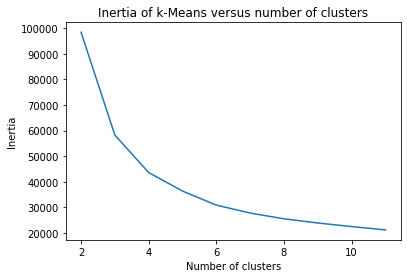

In [368]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters

scores = [KMeans(n_clusters=i+1).fit(X_projected).inertia_ for i in range(10)]


plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [369]:
n_clust = 4

km = KMeans(n_clusters=n_clust, random_state = RandomState)
pred = km.fit_predict(X_projected)


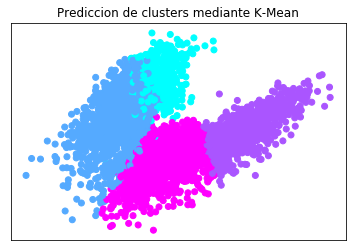

In [370]:
plt.set_cmap('cool')

plt.scatter(X_projected[:, 0], X_projected[:, 1], c=pred)
plt.title("Prediccion de clusters mediante K-Mean")

plt.xticks(())
plt.yticks(())
#plt.savefig('kmeans2.png', dpi=300)
plt.show()


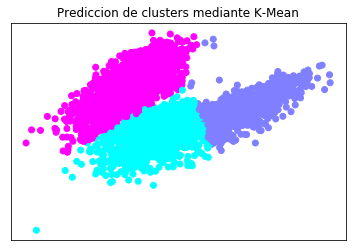

In [399]:
n_clust = 3

km = KMeans(n_clusters=n_clust, random_state = RandomState)
pred = km.fit_predict(X_projected)

plt.set_cmap('cool')

plt.scatter(X_projected[:, 0], X_projected[:, 1], c=pred)
plt.title("Prediccion de clusters mediante K-Mean")

plt.xticks(())
plt.yticks(())
#plt.savefig('kmeans2.png', dpi=300)
plt.show()


### Comentarios
De acuerdo al grafico de inercia, Kmeans sugiere devidir en cuatro clusters.
En la primer grafica se observa que divide las dos ramas mas evidentes del grafico (defensores – delanteros) y que a su vez divide cada rama en los mejores y peores de cada rama. De acuerdo al análisis previo, en las ramas de los mejores se encuentran la mayoría de los mediocampistas

Si elegimos dos cluster , la división que hace Kmeans no es buena

Para tres clusters, separa bien las dos ramas de delanteros , defensores, y a esta ultima la subdivide entre mejores y no tanto. Nuevamente, detro de los mejores estarían incluidos los mediocampistas


### Mean Shift y visualizar en las dos primeras componentes 

In [371]:
##Hay que quitar MachineGun para Clustering
pca=decomposition.PCA(n_components=2, random_state = RandomState)

df_acp=df.loc[:n_acp]
df_acp=df_acp[(df_acp["position"]!='GK')&(df['overall']>70)]

X=df_acp[skills_ratings] # Datos sin estandarizar
X_scaled=std_scale.transform(X) # volvemos a normalizar (ya estaba ajustada)
pca.fit(X_scaled) #input data is centered but not scaled for each feature before applying the SVD
X_projected=pca.transform(X_scaled) #volvemos a proyectar 
print('dimensiones de la base proyectada:', X_projected.shape)

dimensiones de la base proyectada: (4316, 2)


In [389]:
n_samples = len(X_scaled)

bandwidth = estimate_bandwidth(X_scaled, quantile=0.01, n_samples=n_samples)

print(bandwidth)

3.517863761201219


In [390]:

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_scaled)

cluster_labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(cluster_labels)
n_clusters_ = len(labels_unique)

print('Numero estimado de clusters para Mean Shift: %d' % n_clusters_)


Numero estimado de clusters para Mean Shift: 2


In [391]:
#clusters2= ms.labels_

In [392]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

data = []
bool_crack = df_acp['overall'] > 85
bool_no_crack = df_acp['overall'] < 86

kmean_clusters = go.Scatter(x=X_projected[:, 0], y=X_projected[:, 1],
                            mode='markers', text=df_acp.loc[:, 'short_name'],
                            marker=dict(size=5,
                            color=cluster_labels.astype(np.float),
                            colorscale='Portland', showscale=False))  # set color equal to a variable

acp_crack = go.Scatter(
    x=X_projected[bool_crack, 0],
    y=X_projected[bool_crack, 1],
    name='Top players',
    text=df_acp.loc[bool_crack, 'short_name'],
    textfont=dict(family='sans serif', size=10, color='black'),
    opacity=0.9,
    mode='text',
    )

data = [kmean_clusters, acp_crack]

layout = go.Layout(
    title='ACP + Clustering Mean Shift ',
    titlefont=dict(size=20),
    xaxis=dict(title='Componente 1'),
    yaxis=dict(title='Componente 2'),
    autosize=False,
    width=1000,
    height=1000,
    )

fig = go.Figure(data=data, layout=layout)

plot(fig)


'temp-plot.html'

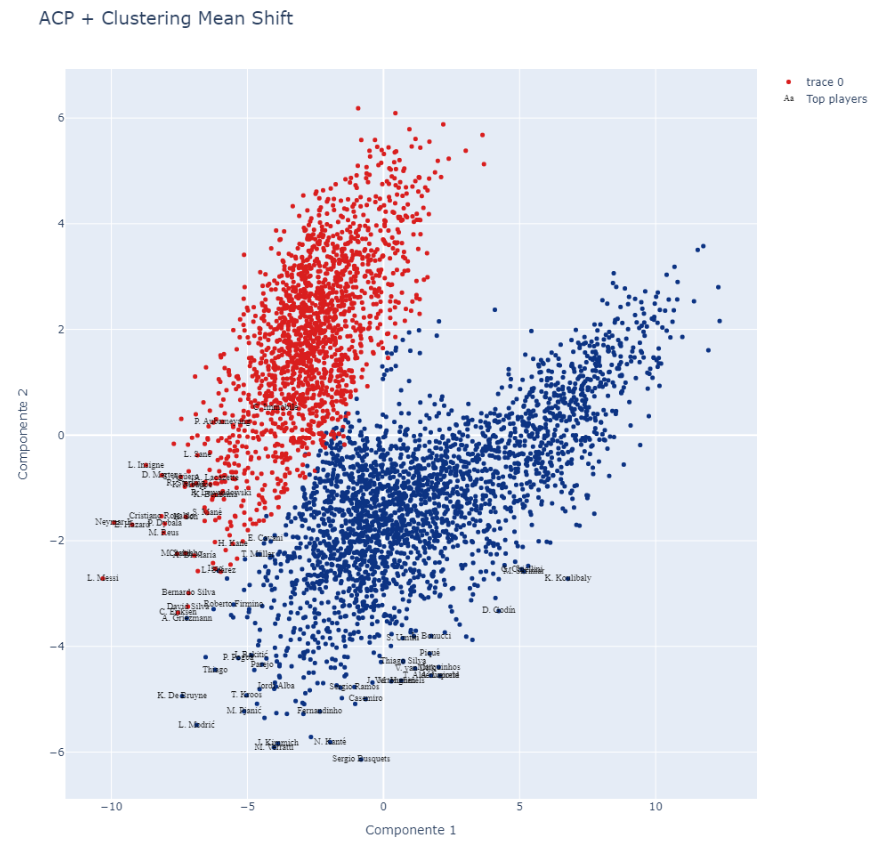

### Comentarios
En el análisis de PCA con MeanShift, el algoritmo encuentra dos grandes cluster que podríamos decir que corresponden a los jugadores con características de delanteros y defensores, los mediocampistas no están separados. Referente a los mediocampistas, para esta segmentación, las características de defensor o delantero tienen mas relevancia que las habilidades que las propias de mediocampista. Recordemos que en general, este grupo de jugadores tiene características compartidas con los otros dos